In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [6]:
# load data
data = pd.read_csv('./search.csv', engine='python')

In [5]:
# feature engineering & extraction
data.head()

,pubmed_id,title,abstract,copyrights,publication_date,authors,keywords,journal,conclusions,methods,results,Rank,Total Cites,Journal Impact Factor,Eigenfactor Score,citation_count
0,33172075,The Trained Sniffer Dog Could Accurately Detec...,(1) Background: Previous reports have indicate...,NaN,11/12/20,"[{'lastname': 'Yamamoto', 'firstname': 'Akihit...","['cervix uteri', 'dogs', 'odorants', 'urine', ...",Cancers,NaN,NaN,NaN,766,"10,442",6.126,0.01874,2.544621
1,33158224,Association between Socioeconomic Status and D...,Although socioeconomic status (SES) has been a...,NaN,11/8/20,"[{'lastname': 'Kawakatsu', 'firstname': 'Yukin...","['cancer risk', 'digestive tract cancer', 'soc...",Cancers,NaN,NaN,NaN,766,"10,442",6.126,0.01874,2.538429
2,33152990,Role of SOX Protein Groups F and H in Lung Can...,The SOX family proteins are proved to play a c...,NaN,11/7/20,"[{'lastname': 'Olbromski', 'firstname': 'Mateu...","['CpG', 'SOX protein family', 'SOX17', 'SOX18'...",Cancers,NaN,NaN,NaN,766,"10,442",6.126,0.01874,9.338422
3,33092262,Polyphenol Intake and Gastric Cancer Risk: Fin...,Phenolic compounds may exert a favorable effec...,NaN,10/24/20,"[{'lastname': 'Vitelli-Storelli', 'firstname':...","['diet', 'epidemiology', 'flavonoids', 'gastri...",Cancers,NaN,NaN,NaN,766,"10,442",6.126,0.01874,9.248802
4,33081243,The Mismatch Repair System (MMR) in Head and N...,The mismatch repair (MMR) system has a major r...,NaN,10/22/20,"[{'lastname': 'Cilona', 'firstname': 'Maria', ...","['MMR proteins', 'MSI', 'head and neck cancer'...",Cancers,NaN,NaN,NaN,766,"10,442",6.126,0.01874,1.585659


In [19]:
data.dtypes

pubmed_id                         int64
title                            object
abstract                         object
copyrights                       object
publication_date         datetime64[ns]
authors                          object
keywords                         object
journal                          object
conclusions                     float64
methods                         float64
results                          object
Rank                              int64
Total Cites                      object
Journal Impact Factor           float64
Eigenfactor Score               float64
citation_count                  float64
dtype: object

In [23]:
data['publication_date'] = pd.to_datetime(data.publication_date)
data['published_year'] = pd.DatetimeIndex(data.publication_date).year
data['published_month'] = pd.DatetimeIndex(data.publication_date).month

In [24]:
data.columns

Index(['pubmed_id', 'title', 'abstract', 'copyrights', 'publication_date',
       'authors', 'keywords', 'journal', 'conclusions', 'methods', 'results',
       'Rank', 'Total Cites', 'Journal Impact Factor', 'Eigenfactor Score',
       'citation_count', 'published_year', 'published_month'],
      dtype='object')

In [26]:
df_fit = data[['pubmed_id','published_year', 'published_month', 'journal', 'Journal Impact Factor', 'Eigenfactor Score']]

In [37]:
df_fit["ranking_score"] = df_fit["published_year"]*0.3/1000 \
                            + df_fit["published_month"]*0.2/10 \
                            + df_fit["Journal Impact Factor"]*0.5
df_fit.sort_values("ranking_score", ascending=False).reset_index(drop=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,pubmed_id,published_year,published_month,journal,Journal Impact Factor,Eigenfactor Score,ranking_score
0,32880368,2020,9,eLife,7.080,0.28713,4.3260
1,32963006,2020,9,mBio,6.784,0.07610,4.1780
2,33172075,2020,11,Cancers,6.126,0.01874,3.8890
3,33158224,2020,11,Cancers,6.126,0.01874,3.8890
4,33152990,2020,11,Cancers,6.126,0.01874,3.8890
5,33081243,2020,10,Cancers,6.126,0.01874,3.8690
6,33023082,2020,10,Cancers,6.126,0.01874,3.8690
7,33003476,2020,10,Cancers,6.126,0.01874,3.8690
8,33092262,2020,10,Cancers,6.126,0.01874,3.8690
9,33066529,2020,10,Cancers,6.126,0.01874,3.8690


In [38]:
df_fit = pd.get_dummies(df_fit, columns=['journal'], drop_first = True)

In [39]:
df_fit

,pubmed_id,published_year,published_month,Journal Impact Factor,Eigenfactor Score,ranking_score,journal_Biomolecules,journal_Cancers,journal_Cells,journal_ChemMedChem,journal_CytoJournal,journal_Epigenomics,journal_Journal of Cancer,journal_Microorganisms,journal_Nutrients,journal_PeerJ,journal_eLife,journal_iScience,journal_mBio
0,33172075,2020,11,6.126,0.01874,3.8890,0,1,0,0,0,0,0,0,0,0,0,0,0
1,33158224,2020,11,6.126,0.01874,3.8890,0,1,0,0,0,0,0,0,0,0,0,0,0
2,33152990,2020,11,6.126,0.01874,3.8890,0,1,0,0,0,0,0,0,0,0,0,0,0
3,33092262,2020,10,6.126,0.01874,3.8690,0,1,0,0,0,0,0,0,0,0,0,0,0
4,33081243,2020,10,6.126,0.01874,3.8690,0,1,0,0,0,0,0,0,0,0,0,0,0
5,33066529,2020,10,6.126,0.01874,3.8690,0,1,0,0,0,0,0,0,0,0,0,0,0
6,33023082,2020,10,6.126,0.01874,3.8690,0,1,0,0,0,0,0,0,0,0,0,0,0
7,33003476,2020,10,6.126,0.01874,3.8690,0,1,0,0,0,0,0,0,0,0,0,0,0
8,32842638,2020,8,6.126,0.01874,3.8290,0,1,0,0,0,0,0,0,0,0,0,0,0
9,32824568,2020,8,6.126,0.01874,3.8290,0,1,0,0,0,0,0,0,0,0,0,0,0


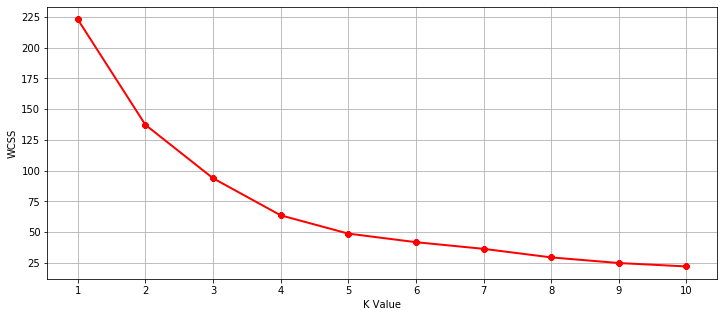

In [43]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_fit.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,5))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

# Based on the graph, so the k = 5

In [44]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(df_fit.iloc[:,1:]) # use 5 as cluster number hyperparameter

In [45]:
df_fit["label"] = kmeans.predict(df_fit.iloc[:,1:])

In [46]:
df_fit

,pubmed_id,published_year,published_month,Journal Impact Factor,Eigenfactor Score,ranking_score,journal_Biomolecules,journal_Cancers,journal_Cells,journal_ChemMedChem,journal_CytoJournal,journal_Epigenomics,journal_Journal of Cancer,journal_Microorganisms,journal_Nutrients,journal_PeerJ,journal_eLife,journal_iScience,journal_mBio,label
0,33172075,2020,11,6.126,0.01874,3.8890,0,1,0,0,0,0,0,0,0,0,0,0,0,2
1,33158224,2020,11,6.126,0.01874,3.8890,0,1,0,0,0,0,0,0,0,0,0,0,0,2
2,33152990,2020,11,6.126,0.01874,3.8890,0,1,0,0,0,0,0,0,0,0,0,0,0,2
3,33092262,2020,10,6.126,0.01874,3.8690,0,1,0,0,0,0,0,0,0,0,0,0,0,2
4,33081243,2020,10,6.126,0.01874,3.8690,0,1,0,0,0,0,0,0,0,0,0,0,0,2
5,33066529,2020,10,6.126,0.01874,3.8690,0,1,0,0,0,0,0,0,0,0,0,0,0,2
6,33023082,2020,10,6.126,0.01874,3.8690,0,1,0,0,0,0,0,0,0,0,0,0,0,2
7,33003476,2020,10,6.126,0.01874,3.8690,0,1,0,0,0,0,0,0,0,0,0,0,0,2
8,32842638,2020,8,6.126,0.01874,3.8290,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,32824568,2020,8,6.126,0.01874,3.8290,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
def return_label(df):
    articles = []
    label = df.iloc[0]["label"]
    for i,row in df.iterrows():
        if row["label"] == label:
            articles.append(row["pubmed_id"])
    return articles

In [55]:
ids = return_label(df_fit)
print(ids)

[33172075.0, 33158224.0, 33152990.0, 33092262.0, 33081243.0, 33066529.0, 33023082.0, 33003476.0, 32963006.0, 32880368.0]
